In [1]:
export_path = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_cond/DE_minPct_00_pval0.1/btwnClust/GSEA_pthresh_0.1/"
#gsea_dir = "/mnt/md0/isshamie/Projects/Mito_Trace/software/Bioinformatics_Tools/"
cells_meta_f = "None"

In [2]:
import os
from os.path import basename, dirname, join, exists
import pandas as pd
from glob import glob
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
outdir = join(export_path, "summary")
if not exists(outdir):
    os.mkdir(outdir)

In [4]:
gsea_outs = glob(export_path+"/*xlsx")
names = [basename(f.split("gsea.xlsx")[0].strip("_").replace(".tsv", "")) for f in gsea_outs ]
names

['cluster8.DE',
 'cluster4.DE',
 'cluster0.DE',
 'cluster3.DE',
 'cluster10.DE',
 'cluster6.DE',
 'cluster9.DE',
 'cluster1.DE',
 'cluster2.DE',
 'cluster13.DE',
 'cluster5.DE',
 'cluster11.DE',
 'cluster14.DE',
 'cluster12.DE']

In [5]:
def hasOverlapInds(gene_set_ids):
    gene_sets = []
    if len(gene_set_ids)<=1:
        return False
    for g in gene_set_ids:
       # print(gene_set_ids[g])
        gene_sets.append(set(gene_set_ids[g]))

    intersection = set.intersection(*gene_sets)
    if len(intersection)>0:
        print('gene_sets')
        print(gene_sets)
        print("intersection")
        print(intersection)
    return len(intersection)>0

f /data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_cond/DE_minPct_00_pval0.1/btwnClust/GSEA_pthresh_0.1/cluster8.DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_cond/DE_minPct_00_pval0.1/btwnClust/GSEA_pthresh_0.1/cluster4.DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_cond/DE_minPct_00_pval0.1/btwnClust/GSEA_pthresh_0.1/cluster0.DE.tsv_gsea.xlsx
f /data/Mito_Trace/

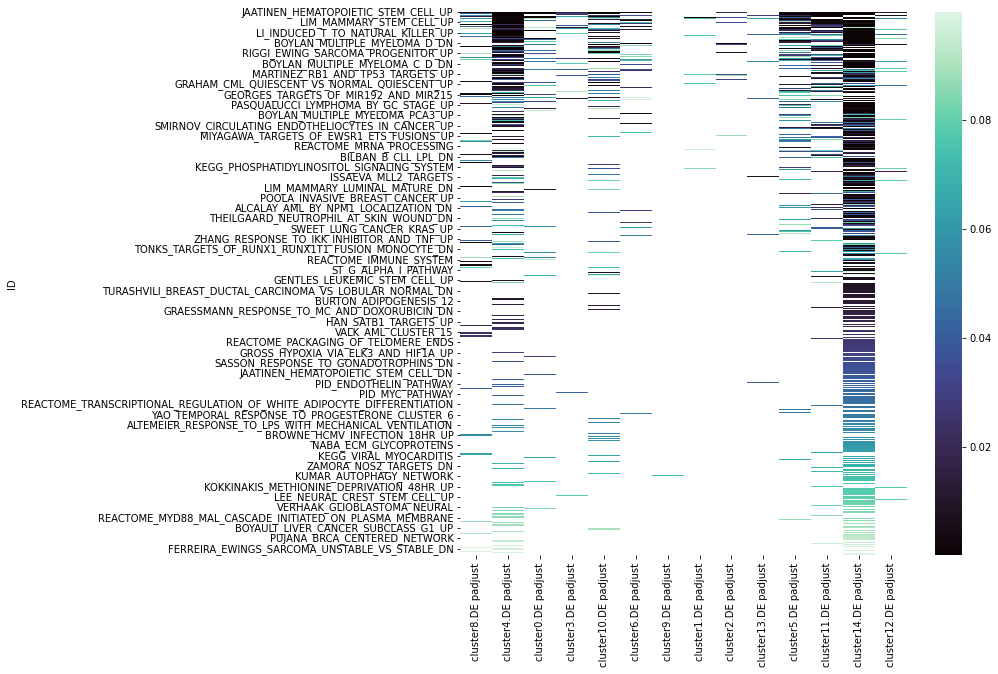

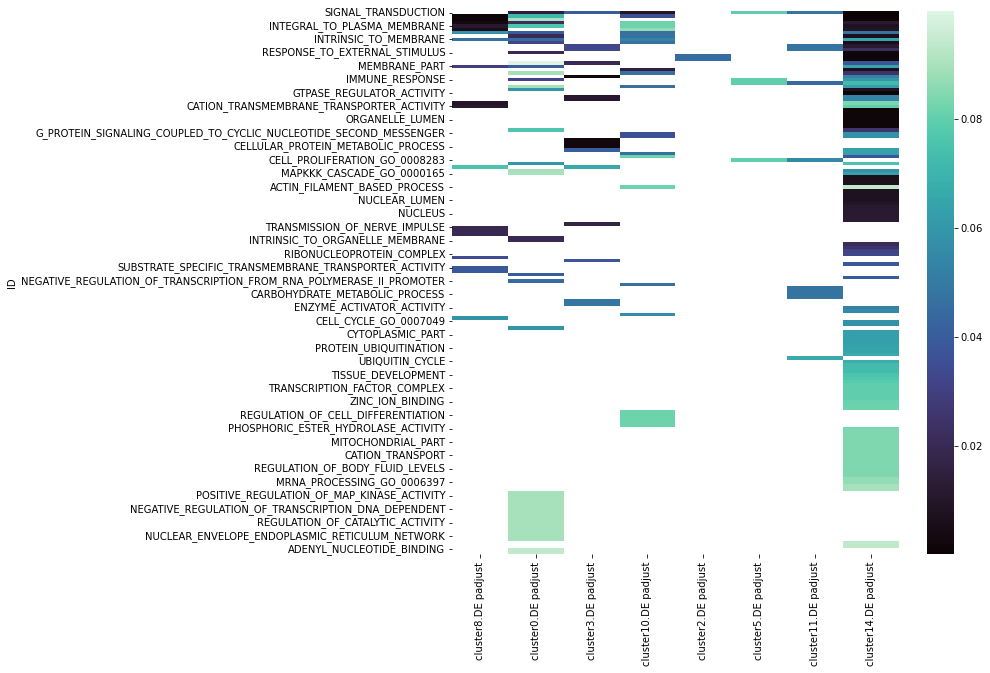

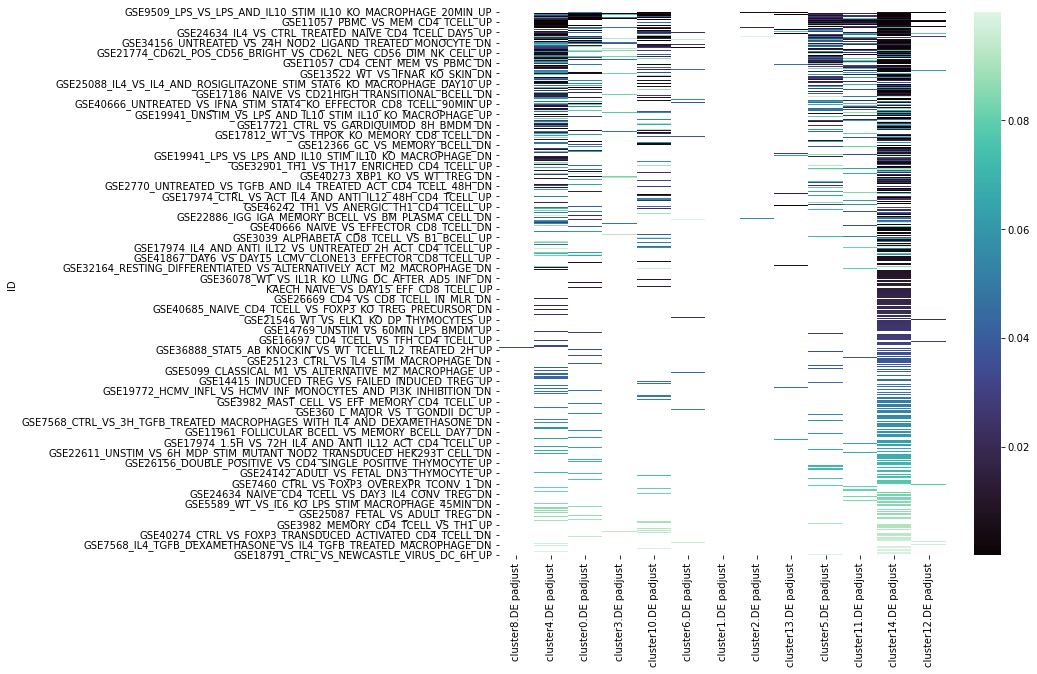

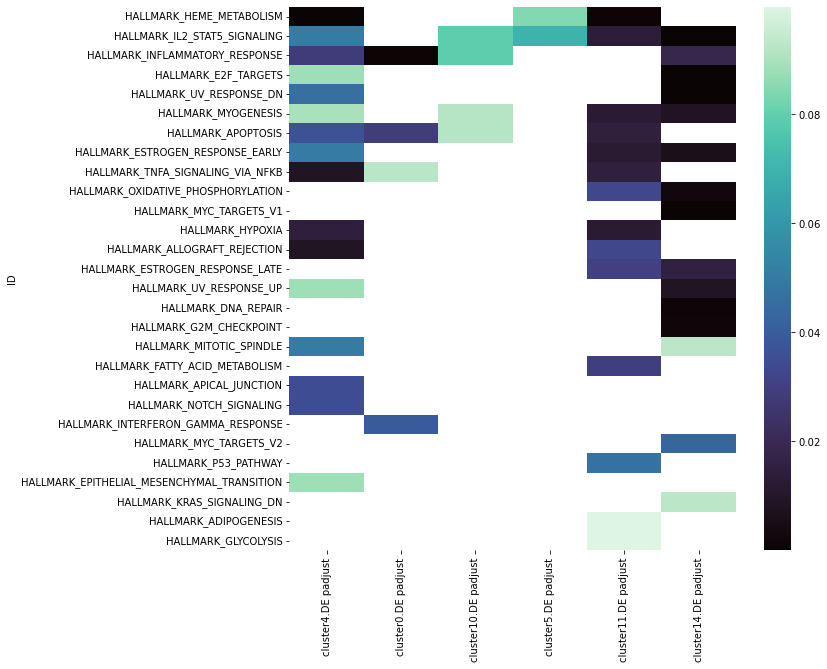

In [6]:
out_ds = defaultdict(list)
#out_d = []
all_gene_set_ids = defaultdict(set)
for ind, f in enumerate(gsea_outs):
    print('f', f)
    data = pd.read_excel(f, sheet_name=None)
    name = names[ind]
    curr_comp = []
    gene_set_ids = defaultdict(list)
    for grp in data:
        curr_grp = data[grp].copy().set_index("ID")
        
        curr_grp = curr_grp[[ "p.adjust"]]#, "NES", "setSize"]]
        curr_grp = curr_grp.rename({"p.adjust":f"{name} padjust"} #"NES":f"{name} NES", "setSize":f"{name} setSize", 
                                    ,axis=1)
        curr_comp.append(curr_grp)
        gene_set_ids[grp].extend(curr_grp.index.values)
        all_gene_set_ids[grp] = all_gene_set_ids[grp].union(set(curr_grp.index.values))
        
        out_ds[grp].append(curr_grp)
    assert(not hasOverlapInds(gene_set_ids))
    # concat row-wise since IDs are not the same
    #out_d.append(pd.concat(curr_comp, ignore_index=False))
    
#out_df = pd.concat(out_d, axis=1)

#curr_grp["Db"] = grp

out_dfs = {x:pd.concat(out_ds[x], axis=1, ignore_index=False) for x in out_ds}

for grp in out_dfs:
    grp_df = out_dfs[grp]
    p_cols = grp_df.columns[grp_df.columns.str.contains("padjust")]
    p_cols
    ordered_inds = np.log10(grp_df.loc[:,p_cols].fillna(1.0)).mean(axis=1, skipna=True).sort_values().index
    grp_df = grp_df.loc[ordered_inds]
    out_dfs[grp] = grp_df


## Save csvs and figures
%matplotlib inline
for grp in out_dfs:
    curr_out_f = join(outdir, f"{grp}_summary")
    out_dfs[grp].to_csv(f"{curr_out_f}.csv")
    f = plt.figure(figsize=(10,10))
    sns.heatmap(out_dfs[grp], cmap="mako")
    plt.savefig(f"{curr_out_f}.pdf", bbox_inches='tight')


f /data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_cond/DE_minPct_00_pval0.1/btwnClust/GSEA_pthresh_0.1/cluster8.DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_cond/DE_minPct_00_pval0.1/btwnClust/GSEA_pthresh_0.1/cluster4.DE.tsv_gsea.xlsx
f /data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_cond/DE_minPct_00_pval0.1/btwnClust/GSEA_pthresh_0.1/cluster0.DE.tsv_gsea.xlsx
f /data/Mito_Trace/

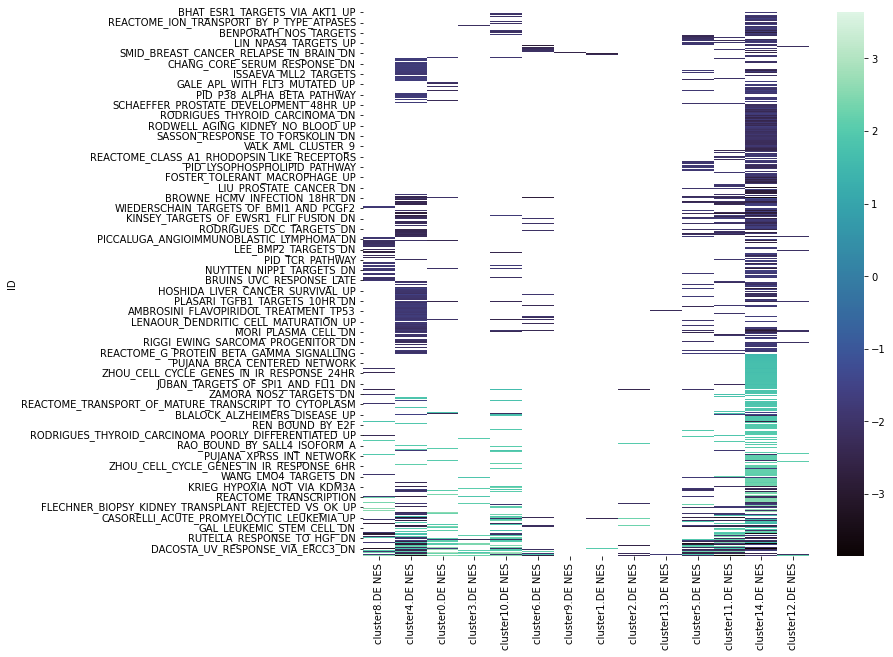

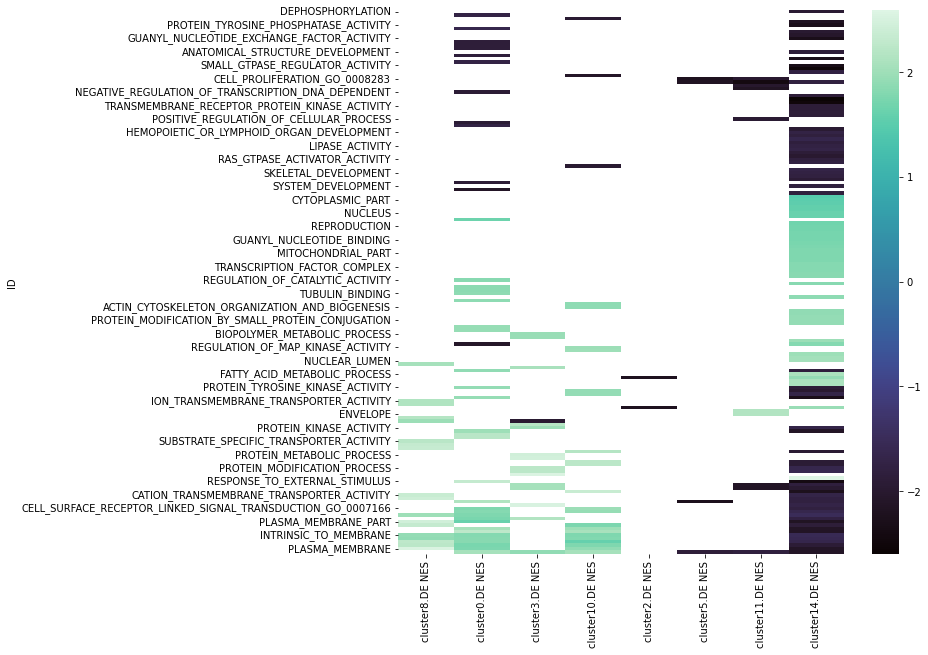

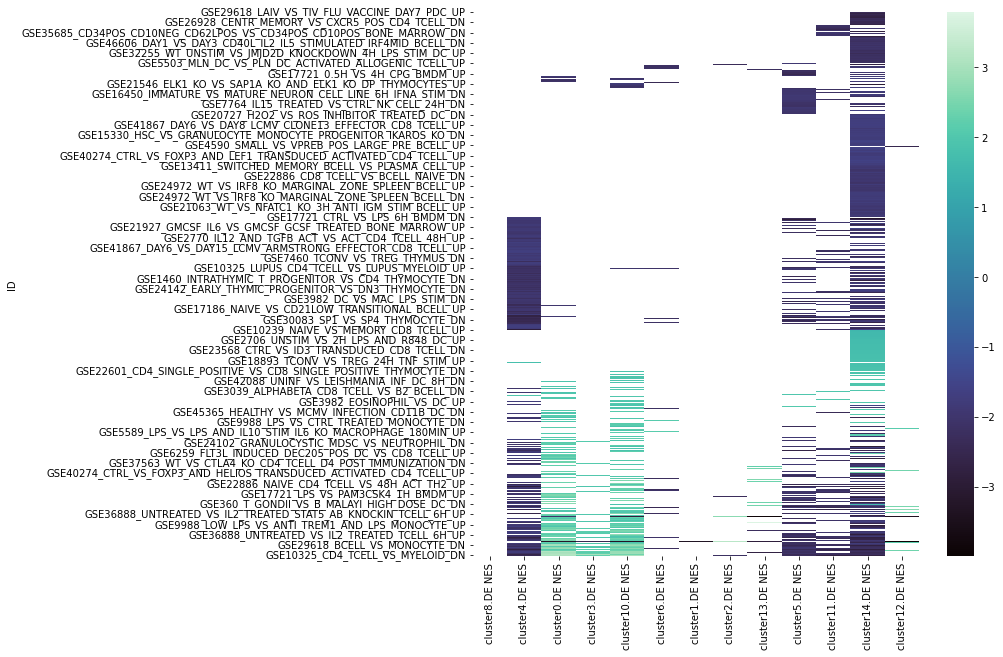

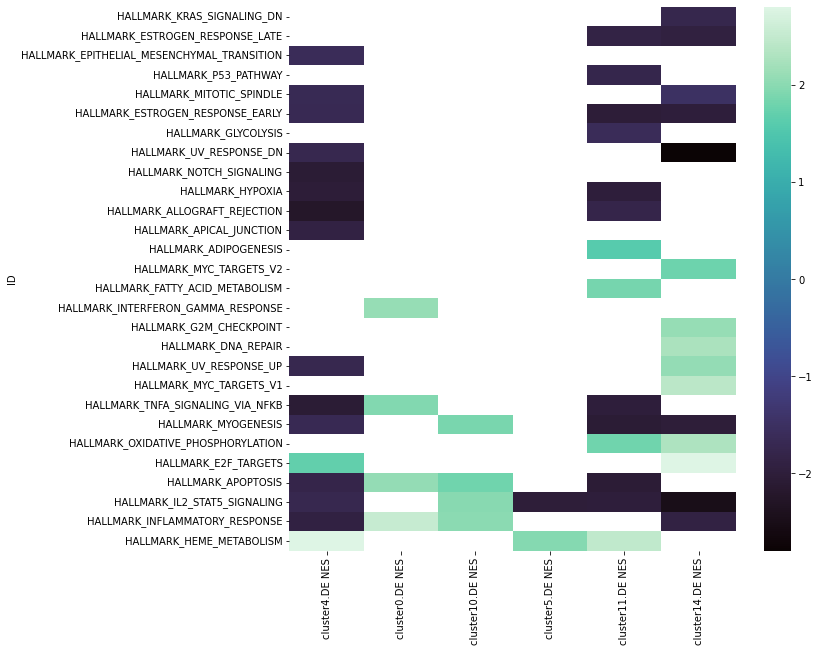

In [7]:
out_ds = defaultdict(list)
#out_d = []
all_gene_set_ids = defaultdict(set)
for ind, f in enumerate(gsea_outs):
    print('f', f)
    data = pd.read_excel(f, sheet_name=None)
    name = names[ind]
    curr_comp = []
    gene_set_ids = defaultdict(list)
    for grp in data:
        curr_grp = data[grp].copy().set_index("ID")
        
        curr_grp = curr_grp[[ "NES"]]#, "NES", "setSize"]]
        curr_grp = curr_grp.rename({"NES":f"{name} NES"} #"NES":f"{name} NES", "setSize":f"{name} setSize", 
                                    ,axis=1)
        curr_comp.append(curr_grp)
        gene_set_ids[grp].extend(curr_grp.index.values)
        all_gene_set_ids[grp] = all_gene_set_ids[grp].union(set(curr_grp.index.values))
        
        out_ds[grp].append(curr_grp)
    assert(not hasOverlapInds(gene_set_ids))
    # concat row-wise since IDs are not the same
    #out_d.append(pd.concat(curr_comp, ignore_index=False))
    
#out_df = pd.concat(out_d, axis=1)

#curr_grp["Db"] = grp

out_dfs = {x:pd.concat(out_ds[x], axis=1, ignore_index=False) for x in out_ds}

for grp in out_dfs:
    grp_df = out_dfs[grp]
    p_cols = grp_df.columns[grp_df.columns.str.contains("NES")]
    p_cols
    ordered_inds = np.log10(grp_df.loc[:,p_cols].fillna(1.0)).mean(axis=1, skipna=True).sort_values().index
    grp_df = grp_df.loc[ordered_inds]
    out_dfs[grp] = grp_df
    
    
## Save csvs and figures
%matplotlib inline
for grp in out_dfs:
    curr_out_f = join(outdir, f"{grp}_NES_summary")
    out_dfs[grp].to_csv(f"{curr_out_f}.csv")
    f = plt.figure(figsize=(10,10))
    sns.heatmap(out_dfs[grp], cmap="mako")
    plt.savefig(f"{curr_out_f}.pdf", bbox_inches='tight')


## Add donor and clone counts if there's a cells_meta

In [8]:
if cells_meta_f is not None and cells_meta_f != "None":
    cells_meta = pd.read_csv(cells_meta_f, sep="\t")

### 